# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

Which variables would we need to **dummify**?

In [51]:
from palmerpenguins import load_penguins
import pandas as pd
import numpy as np

In [52]:
df_penguins = load_penguins()
df_penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


We would need to dummify Sex, Island, and Species.

Let's use `bill_length_mm` to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Simple linear regression (e.g. straight-line) model
* Quadratic (degree 2 polynomial) model
* Cubic (degree 3 polynomial) model
* Degree 10 polynomial model

Make predictions for each model and plot your fitted models on the scatterplot.

In [53]:
df_penguins = df_penguins.dropna(subset=["bill_depth_mm", "bill_length_mm"])

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

y = df_penguins["bill_depth_mm"]
X = df_penguins[["bill_length_mm"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

lr = LinearRegression()
lr_fit = lr.fit(X_train, y_train)

y_pred_lr = lr_fit.predict(X_test)

df_linear = pd.DataFrame({"Actual": y_test,
              "Predicted": y_pred_lr})

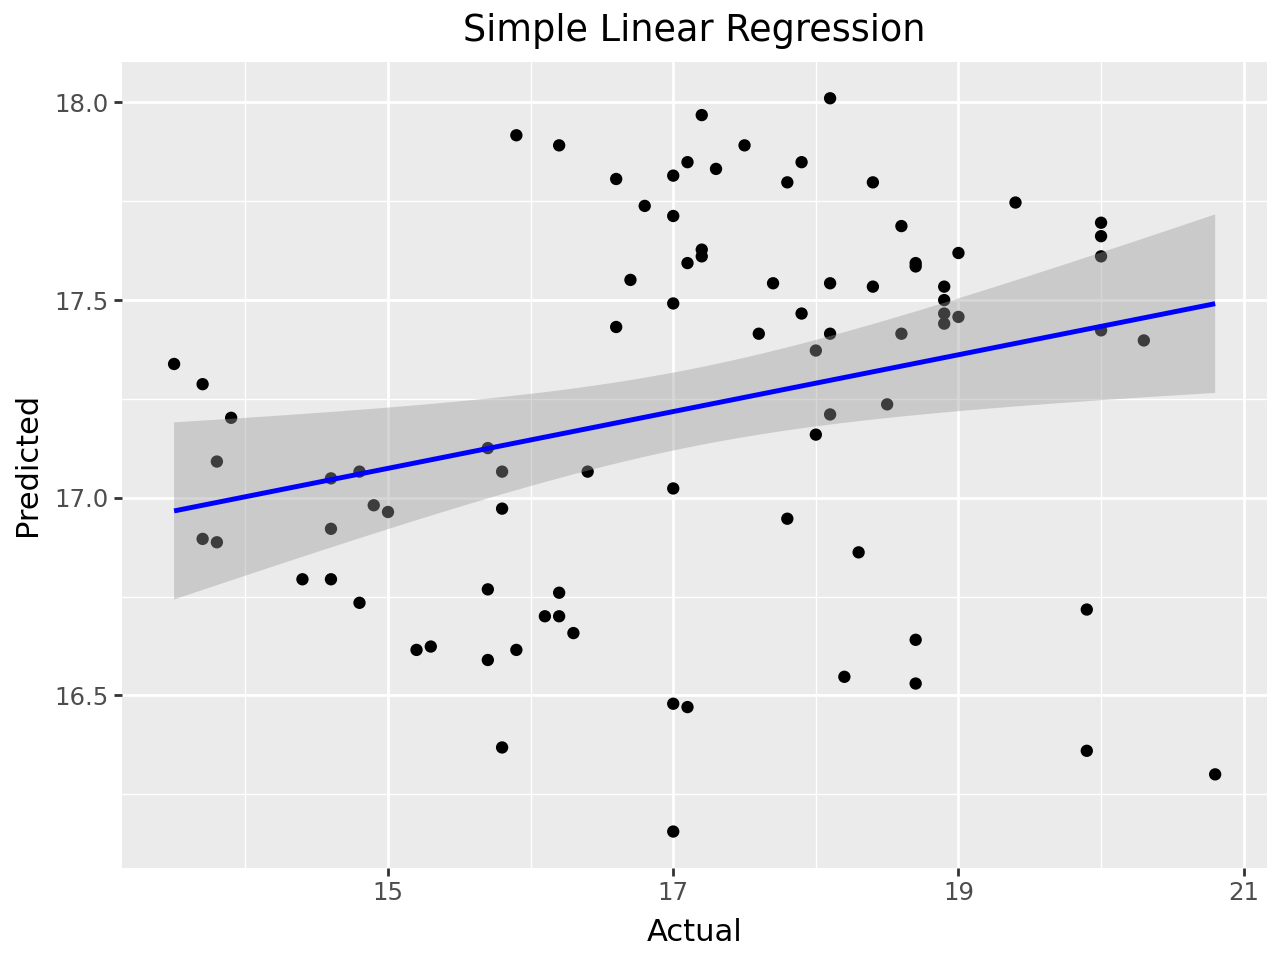

In [55]:
from plotnine import aes, geom_point, ggplot, labs, geom_smooth

(ggplot(df_linear, aes(x="Actual", y="Predicted"))
+ geom_point()
+ labs(title="Simple Linear Regression")
+ geom_smooth(method='lm', color='blue'))

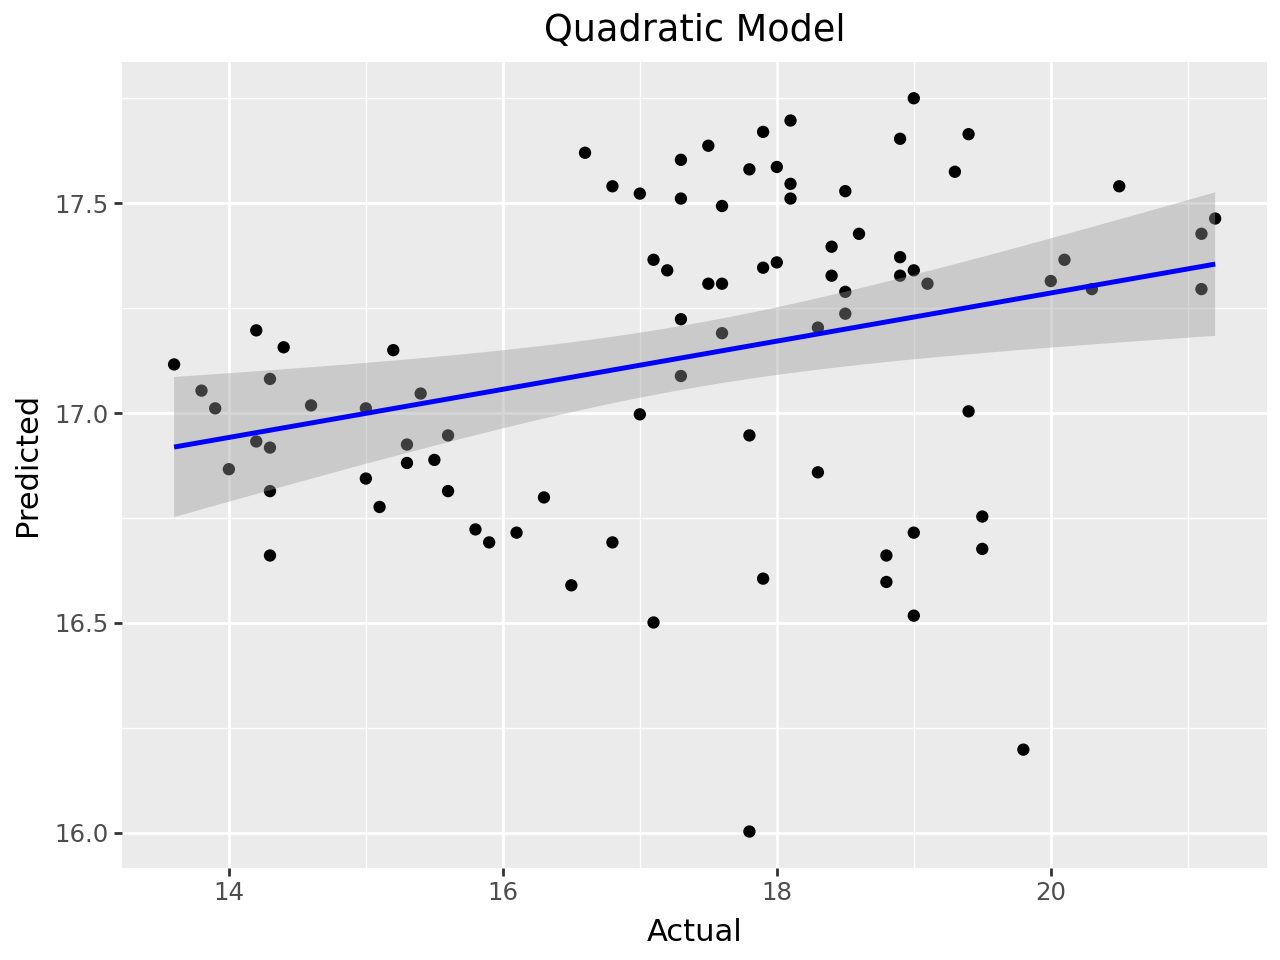

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df_penguins["bill_length_mm_2"] = df_penguins[["bill_length_mm"]] ** 2

y = df_penguins["bill_depth_mm"]
X = df_penguins[["bill_length_mm_2"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

lr = LinearRegression()
lr_fit = lr.fit(X_train, y_train)

y_pred_quad = lr_fit.predict(X_test)

df_quad = pd.DataFrame({"Actual": y_test,
              "Predicted": y_pred_quad})

from plotnine import aes, geom_point, ggplot, labs, geom_smooth

(ggplot(df_quad, aes(x="Actual", y="Predicted"))
+ geom_point()
+ labs(title="Quadratic Model")
+ geom_smooth(method='lm', color='blue'))

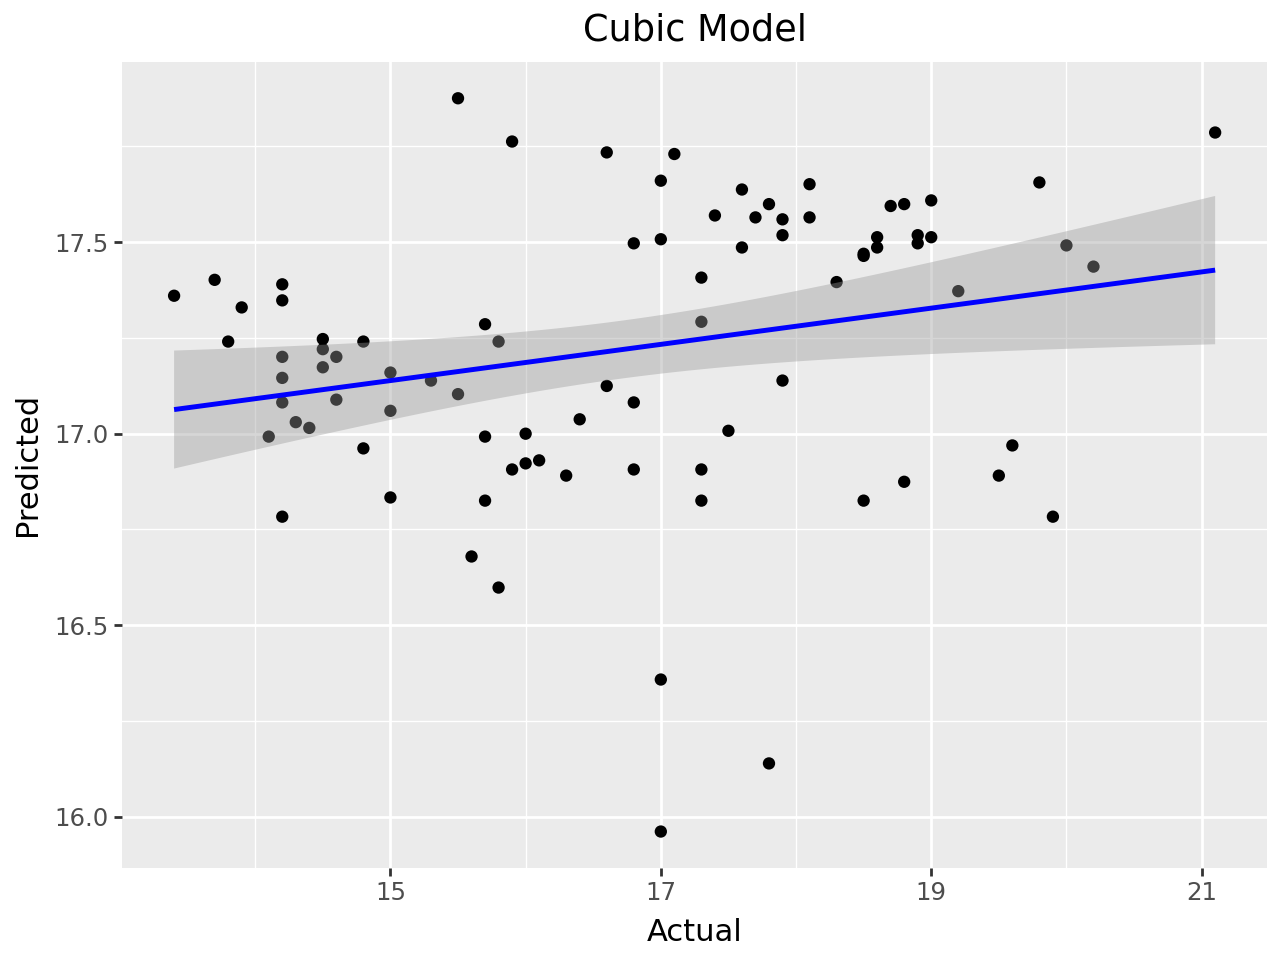

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df_penguins["bill_length_mm_3"] = df_penguins[["bill_length_mm"]] ** 3

y = df_penguins["bill_depth_mm"]
X = df_penguins[["bill_length_mm_3"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

lr = LinearRegression()
lr_fit = lr.fit(X_train, y_train)

y_pred_cubic = lr_fit.predict(X_test)

df_cubic = pd.DataFrame({"Actual": y_test,
              "Predicted": y_pred_cubic})

from plotnine import aes, geom_point, ggplot, labs, geom_smooth

(ggplot(df_cubic, aes(x="Actual", y="Predicted"))
+ geom_point()
+ labs(title="Cubic Model")
+ geom_smooth(method='lm', color='blue'))

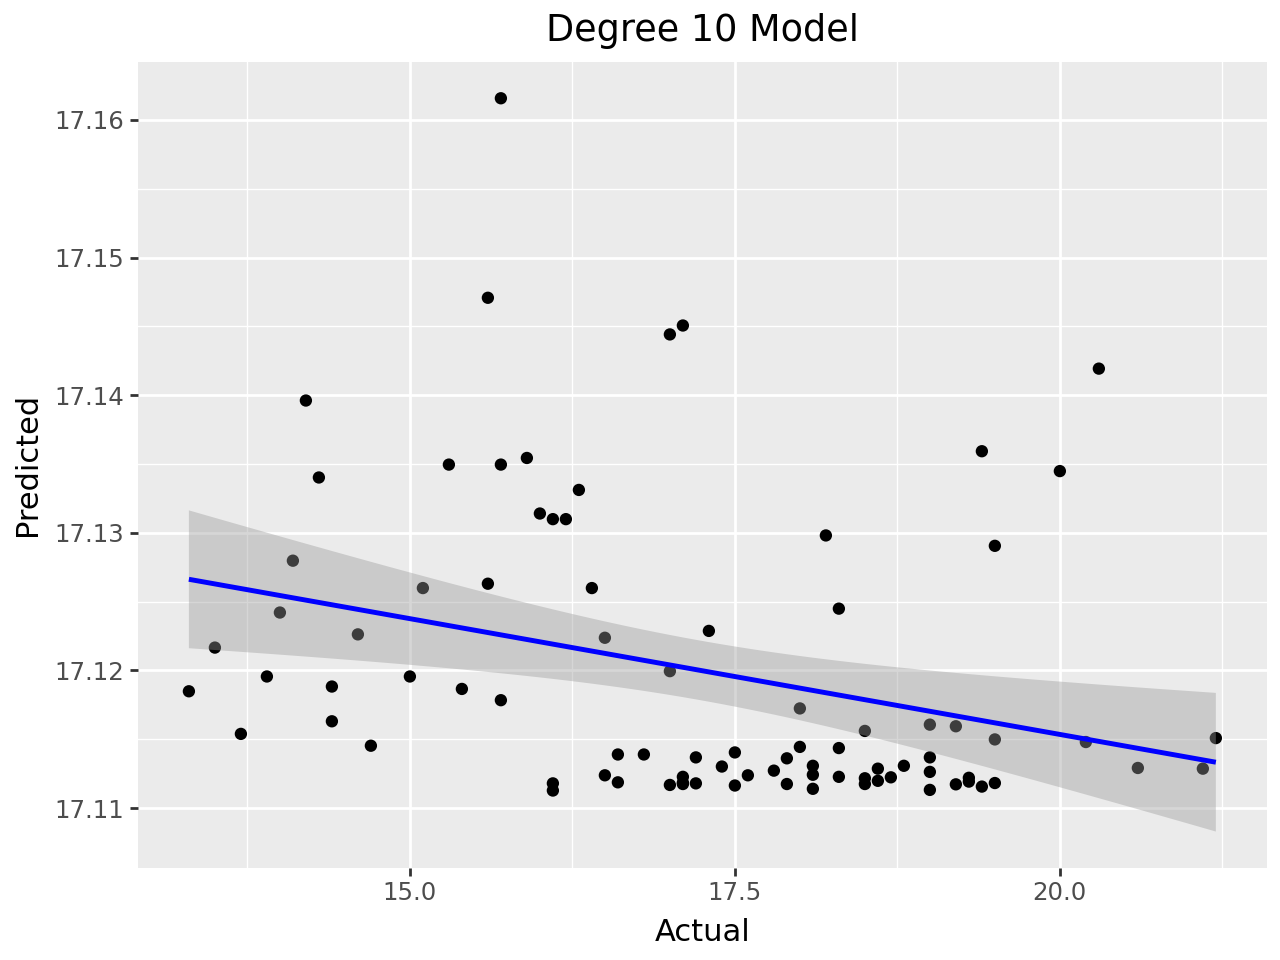

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df_penguins["bill_length_mm_10"] = df_penguins[["bill_length_mm"]] ** 10

y = df_penguins["bill_depth_mm"]
X = df_penguins[["bill_length_mm_10"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

lr = LinearRegression()
lr_fit = lr.fit(X_train, y_train)

y_pred_10 = lr_fit.predict(X_test)

df_10 = pd.DataFrame({"Actual": y_test,
              "Predicted": y_pred_10})

from plotnine import aes, geom_point, ggplot, labs, geom_smooth

(ggplot(df_10, aes(x="Actual", y="Predicted"))
+ geom_point()
+ labs(title="Degree 10 Model")
+ geom_smooth(method='lm', color='blue'))

In [60]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(y_test, y_pred_lr))
print(mean_squared_error(y_test, y_pred_quad))
print(mean_squared_error(y_test, y_pred_cubic))
print(mean_squared_error(y_test, y_pred_10))

3.5969775618649265
3.868315264826904
3.8762972974235956
3.577832391200686
3.5969775618649265
3.868315264826904
3.8762972974235956
3.577832391200686


In [ ]:
print(mean_squared_error(y_test, y_pred_lr))
print(mean_squared_error(y_test, y_pred_quad))
print(mean_squared_error(y_test, y_pred_cubic))
print(mean_squared_error(y_test, y_pred_10))

In [62]:
from sklearn.metrics import r2_score

print(r2_score(y_test, y_pred_lr))
print(r2_score(y_test, y_pred_quad))
print(r2_score(y_test, y_pred_cubic))
print(r2_score(y_test, y_pred_10))

-0.012575569363544536
-0.08895912315031618
-0.09120612387863969
-0.007186063381790619
-0.012575569363544536
-0.08895912315031618
-0.09120612387863969
-0.007186063381790619


* Are any of the models above underfitting the data? If so, which ones and how can you tell?
* Are any of thhe models above overfitting the data? If so, which ones and how can you tell?
* Which of the above models do you think fits the data best and why?